# this is a demo of how a simple GP works


In [6]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [7]:
%matplotlib inline 
from matplotlib import (gridspec, rc)
import matplotlib.pyplot as plt
rc("font", family='serif')

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [8]:
import ipywidgets as widgets
from ipywidgets import interact

In [9]:
import george 
import numpy as np
from george.kernels import ExpSquaredKernel

# draw data from a Sine function

In [10]:
np.random.seed(1)  # set seed for reproducibility

In [30]:
data_pt_no = 20
inv_phase = 7.
noise_amp = 0.15
x = np.sort(np.random.rand(data_pt_no))
y = np.sin(x * inv_phase)
yerr = noise_amp * np.random.randn(data_pt_no)
y += yerr
x_sine = np.arange(np.min(x), 1., 0.05)
y_sine = np.sin(x_sine * inv_phase)

# initialize a Gaussian Process

In [33]:
def plot_GP(inv_lambda=1., l_sq=1., save=False):
    # form the kernel 
    gp = george.GP(
        inv_lambda * ExpSquaredKernel(l_sq, ndim=1))
    gp.compute(x, yerr)
    
    cov_kernel = gp.get_matrix(x)
    
    prior_samples = gp.sample_conditional(y, x, size=100)
    fig = plt.figure(figsize=(21, 7))
    gs = gridspec.GridSpec(1, 2)
    gs.update(wspace=0.1)
    
    ax1 = plt.subplot(gs[0, 0])
    ax2 = plt.subplot(gs[0, 1])
    
    # aesthetics
    alpha=0.3
    sample_color = 'gray'
    # plot the realizations
    ax1.plot(x, prior_samples[0], color=sample_color, alpha=0.5,
             label='GP realization')
    
    mean_x, pred_cov = gp.predict(y, x)
    
    for samples in prior_samples[1:]:
        ax1.plot(x, samples, color=sample_color, alpha=alpha)
    ax1.plot(x, mean_x, 'r', 
             label='Mean GP realization')    
    #ax1.plot(x, np.mean(prior_samples, axis=0), 'r', 
    #         label='averaged GP realization')
    
    ax1.plot(x_sine, y_sine, 'b', linestyle='--', label='Sine function')
    
    ax1.set_ylabel(r'$\psi$')
    ax1.set_xlabel(r'$\vec{x}$')
    
    ax1.plot(x, y, 'k.')
    ax1.errorbar(x, y, yerr=yerr, fmt=None, ecolor='black',
                 label='Noisy data')
    
    ax1.set_title(
        'GP data realizations with {} data points'.format(data_pt_no),
        size=20
    )
    ax1.legend(loc='upper right', numpoints=1, frameon=False)
    
    # cov. matrix
    im = ax2.imshow(cov_kernel, cmap=plt.cm.summer,
                    vmin=0., vmax=1.)
    ax2.set_xlabel(r'sorted $\vec{x}$ entry number')
    ax2.set_ylabel(r'sorted $\vec{x}$ entry number')
    
    ax2.set_title(
        r'Exponential squared kernel with $l^2$ = {}'.format(l_sq),
        size=20
    )
    fig.subplots_adjust(right=0.8)
    cax = fig.add_axes([0.80, 0.15, 0.025, 0.7])
    fig.colorbar(im, cax=cax)
    
    if save:
        filepath = "/Users/karenyng/MyThesis/Figures/chapter4/"
        l_sq_param = str(l_sq).replace('.', 'pt')
        filename = "expSq_kernel_demo_lsq_{}.png".format(l_sq_param)
        fig.savefig(filepath + filename, bbox_inches='tight')

<function __main__.plot_GP>

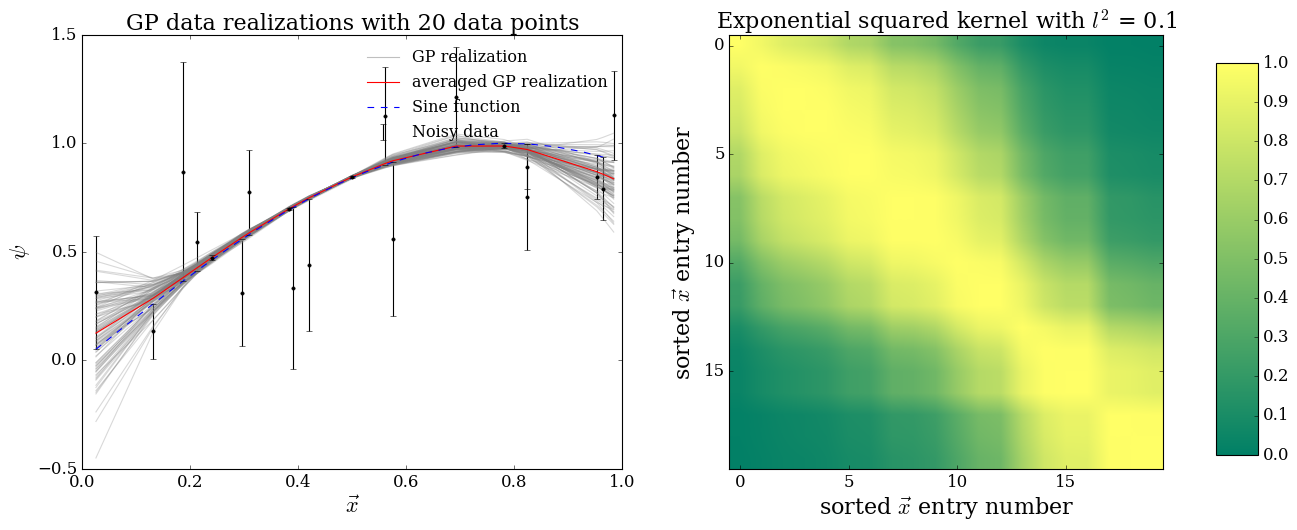

In [23]:
interact(plot_GP, 
         inv_lambda=widgets.FloatSlider(min=0.1, max=1., step=0.1, value=1.),
         l_sq=widgets.FloatSlider(min=0.1, max=1., step=0.1, value=.1),
         save=False
        )

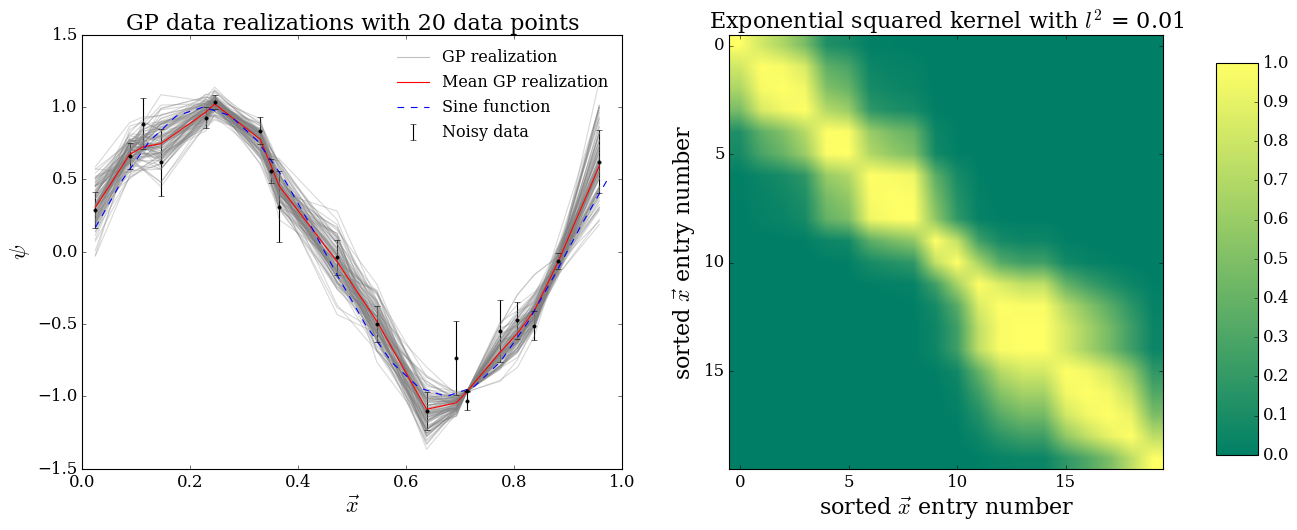

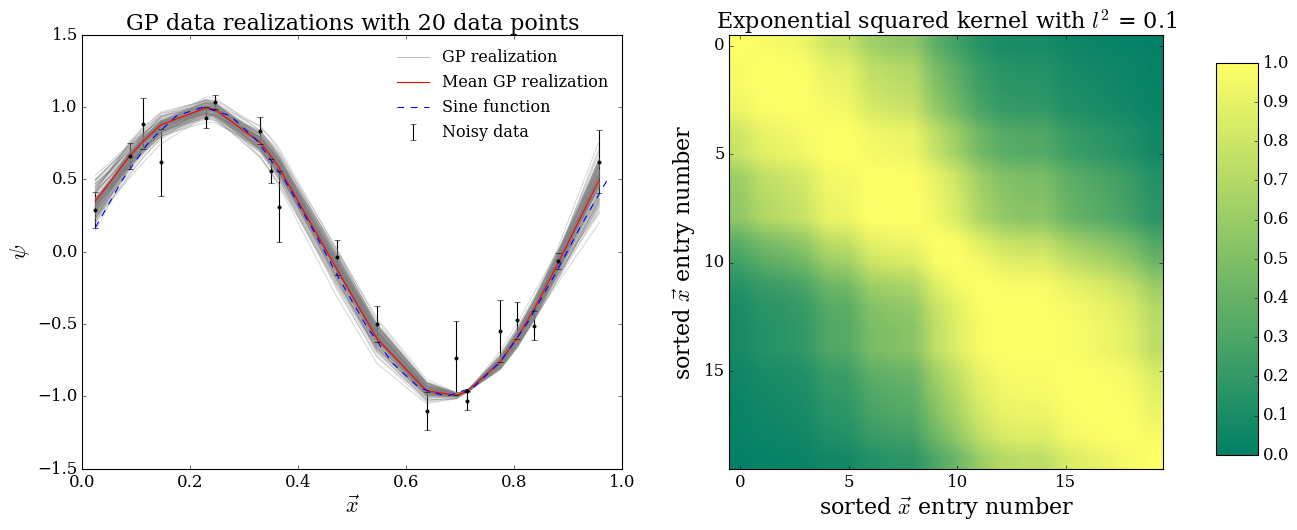

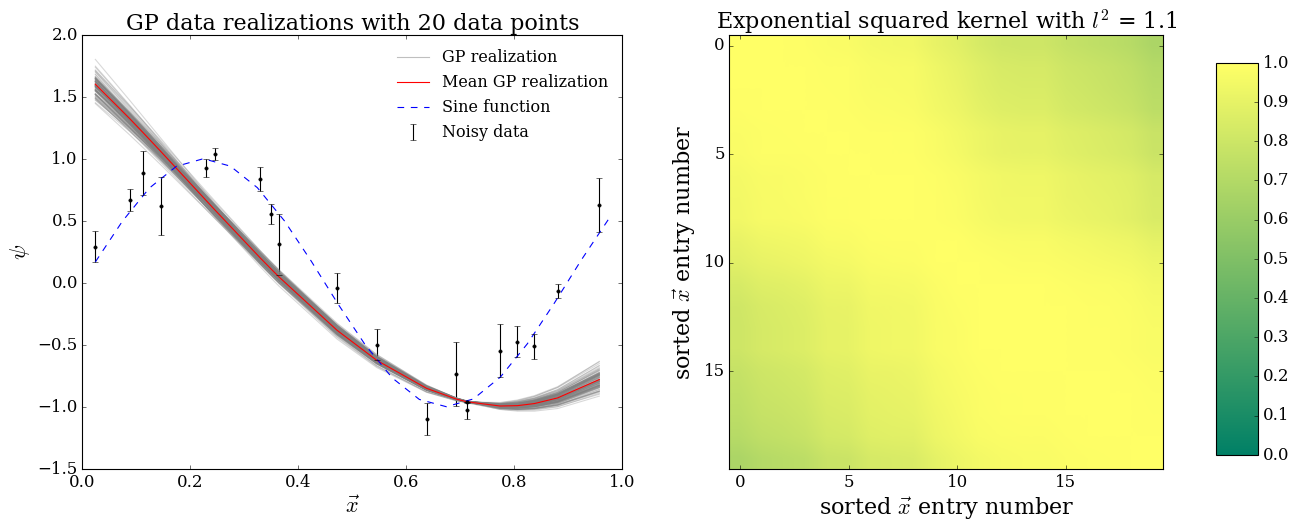

In [34]:
plot_GP(l_sq=0.01, save=True)
plot_GP(l_sq=0.1, save=True)
plot_GP(l_sq=1.1, save=True)